# Stochastic

# Name: Chetan Salunke
#python for remove anxiety
#💖 Python


## 1 Calculate n-step Transition Probability(Chapman-Kolmogrov eq.)

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import matrix_power

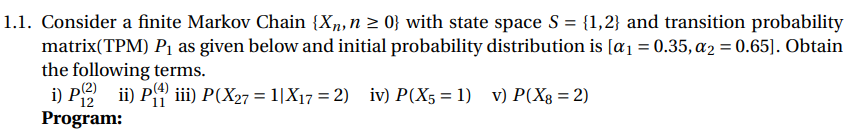

In [221]:
p=np.array([[0.7,0.3],[0.4,0.6]]);p
a=np.array([0.35,0.65])
p12_2=matrix_power(p,2)[0,1];p12_2
p11_4=matrix_power(p,4)[0,0]
p12_10=matrix_power(p,10)[0,1]
p1=(np.multiply(np.transpose(a),matrix_power(p,5)))[0]
p2=(np.multiply(np.transpose(a),matrix_power(p,8)))[1]


In [222]:
pd.DataFrame({'proba':['p12_2','p11_4','p12_10','p(x5=1)','p2(x8=2)'],
    'p':[p12_2,p11_4,p12_10,p1,p2]})


,proba,p
0,p12_2,0.39
1,p11_4,0.5749
2,p12_10,0.428569
3,p(x5=1),"[0.20036449999999997, 0.27789449999999993]"
4,p2(x8=2),"[0.19998687799999998, 0.27859579799999995]"


# Realization of Markov Chain

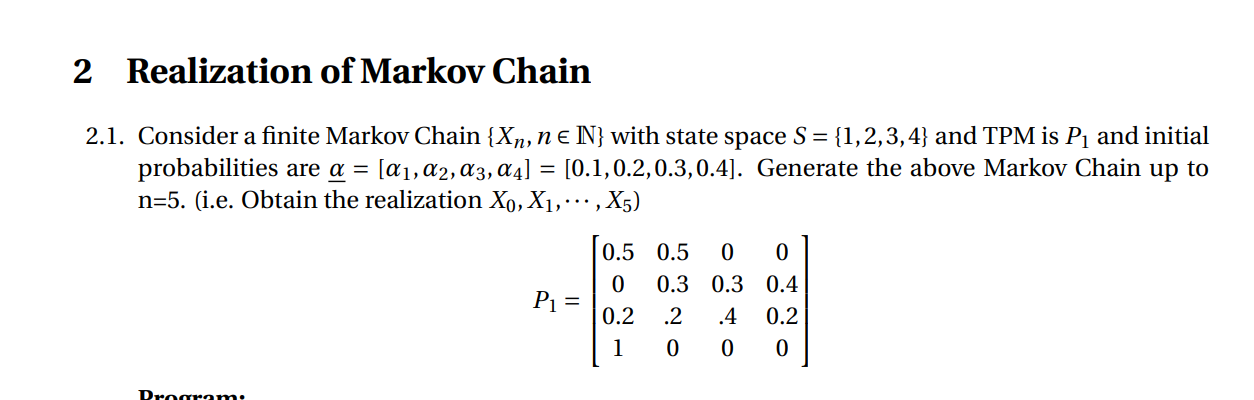


In [223]:

a=np.array([0.1, 0.2, 0.3, 0.4])
s=np.arange(0,len(a),1)
p=np.array([[.5,.5,0,0],[0,.3,.3,.4],[.2,.2,.4,.2],[1,0,0,0]])
x=np.repeat(0,n)
x[0]=np.random.choice(s,1,a.all())
for i in range(1,len(x)):
    x[i]=np.random.choice(s,1,p[x[i-1]].all())
    
    

In [224]:
x

array([3, 3, 1, 1, 3])

In [225]:
def REALIZATION(a,p,n):
    s=np.arange(0,len(a),1)
    x=np.repeat(0,n)
    x[0]=np.random.choice(s,1,a.all())
    for i in range(1,len(x)):
        x[i]=np.random.choice(s,1,p[x[i-1]].all())
    return(x)
    

In [226]:
REALIZATION(a,p,100)

array([2, 3, 1, 3, 2, 2, 3, 3, 1, 3, 3, 2, 1, 2, 2, 2, 1, 0, 3, 3, 2, 1,
       2, 3, 2, 0, 3, 3, 0, 1, 1, 0, 2, 0, 2, 2, 3, 0, 3, 0, 2, 0, 1, 3,
       1, 0, 3, 0, 3, 2, 3, 3, 0, 3, 2, 2, 1, 3, 3, 3, 2, 3, 2, 2, 3, 0,
       0, 0, 0, 1, 3, 3, 2, 2, 2, 3, 0, 1, 0, 2, 0, 2, 3, 2, 0, 0, 3, 2,
       1, 2, 3, 2, 2, 3, 3, 0, 3, 0, 1, 2])


# Simulation of Random Walk

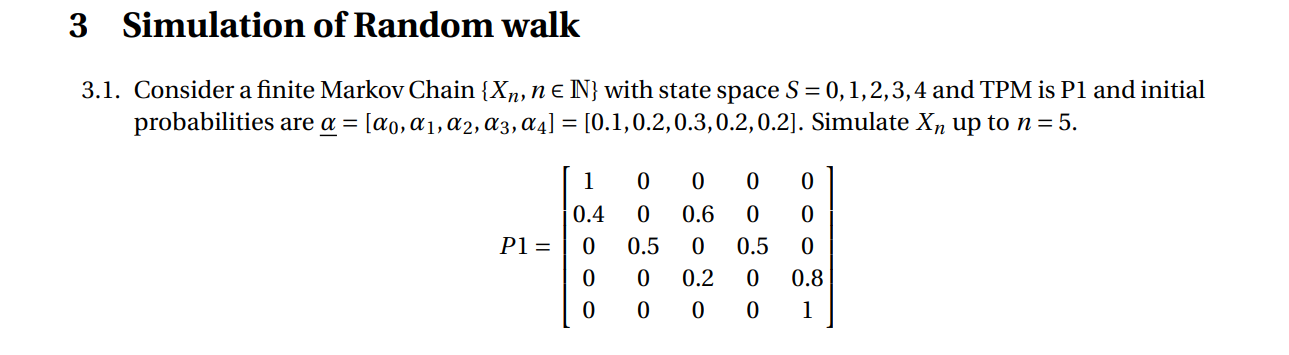

In [227]:
p=np.array([[1,0,0,0,0],[0.4,0,0.6,0,0],[0,0.5,0,0.5,0],[0,0,0,0,1]])
n=5
a=np.arange(0,5,1)
x=np.repeat(0,n)
x[0]=np.random.choice(s,1,a.all())
for i in range(1,len(x)):
    x[i]=np.random.choice(s,1,p[x[i-1]].all())
x  

array([0, 0, 2, 1, 3])

In [228]:
a

array([0, 1, 2, 3, 4])

# Stationary and Limmiting Distribution

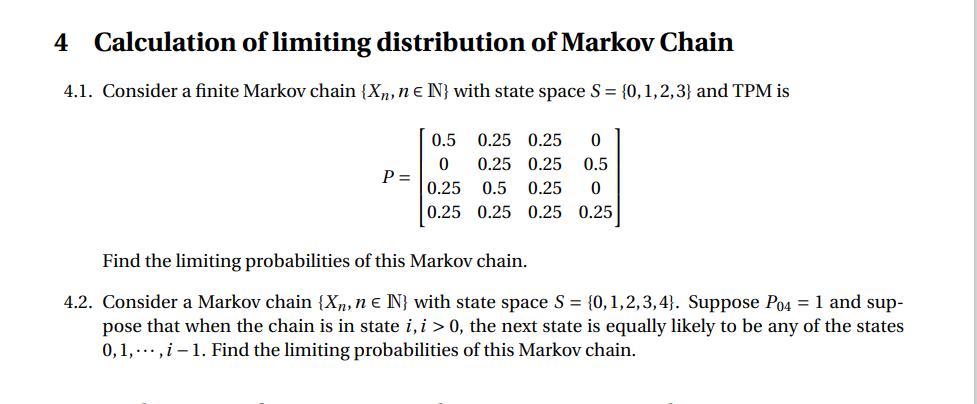

In [229]:
p=np.array([[0.50,0.25,0.25,0.0],[0.0,0.25,0.25,0.50],[0.25,0.50,0.25,0.0],[0.25,0.25,0.25,0.25]])
k=p.shape[0]
A_I=np.subtract(np.eye(k),np.transpose(p))
A=np.vstack((A_I,np.ones(k)))
b=np.hstack((np.zeros(k),np.ones(1)))
solution=np.linalg.solve(np.dot(np.transpose(A),A),np.dot(np.transpose(A),b))
print("Stationary Distribution",solution)


Stationary Distribution [0.22916667 0.3125     0.25       0.20833333]


# Branching Process

# Realization of the Branching Process

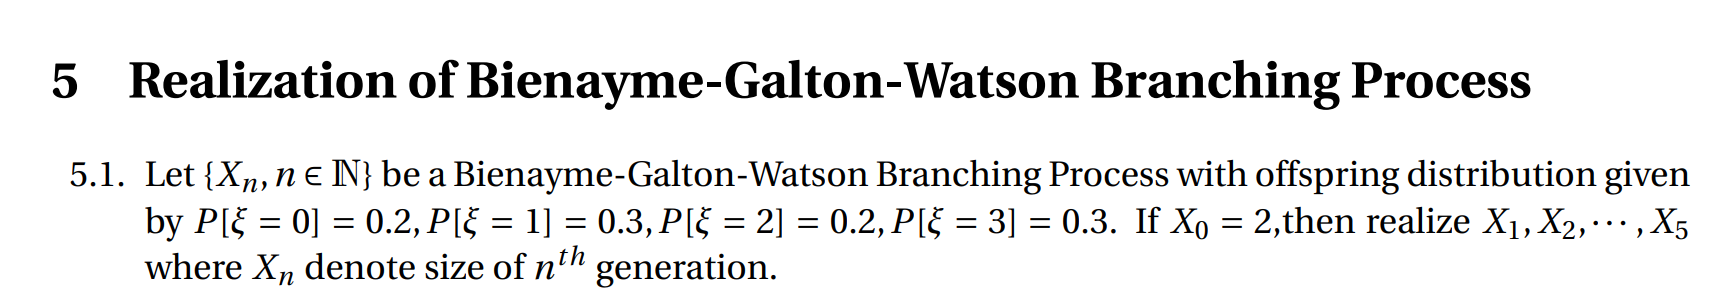

In [230]:
x=np.arange(0,4,1)
px=np.array([0.2,0.3,0.2,0.3])
n=10
z=np.repeat(0,n)
z[0]=2
for i in range(1,n):
    z[i]=sum(np.random.choice(x,z[i-1],px.all()))

In [231]:
z 

array([2, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [232]:
def Branching(x,px,n):
    n=10
    z=np.zeros(n,'int')
    z[0]=2
    for i in range(1,n):
        z[i]=sum(np.random.choice(x,z[i-1],px.all()))
    return(z)

In [233]:
Branching(x,px,20)

array([ 2,  5,  5, 11, 11, 19, 28, 40, 58, 72])

# Simulation of Poisson Process

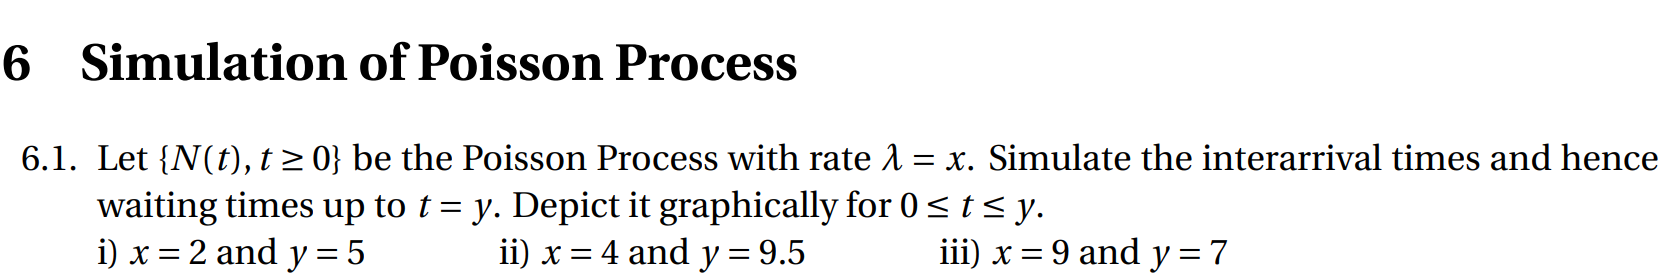

In [240]:
inter=np.random.exponential(1/2,25)
t=5
arr=np.cumsum(inter)
arr=arr[arr<t]
t1=np.hstack((np.zeros(1),arr))
t2=np.hstack((arr,np.array([t])))
pd.DataFrame({'start':t1,
              '----':np.repeat('<t<=',len(t1)),
           'end':t2
             })

,start,----,end
0,0.000000,<t<=,0.797168
1,0.797168,<t<=,0.863193
2,0.863193,<t<=,0.905684
3,0.905684,<t<=,1.154834
4,1.154834,<t<=,1.221924
5,1.221924,<t<=,1.693941
6,1.693941,<t<=,1.866493
7,1.866493,<t<=,2.557431
8,2.557431,<t<=,2.627905
9,2.627905,<t<=,3.247152


In [242]:
def Poisson_Process(lamda,time):
    
    inter=np.random.exponential(1/lamda,25)
    arr=np.cumsum(inter)
    arr=arr[arr<time]
    t1=np.hstack((np.zeros(1),arr))
    t2=np.hstack((arr,np.array([time])))
    df=pd.DataFrame({
        'start':t1,
        '----':np.repeat('<t<=',len(t1)),
        'end':t2
    })
    return df
    



In [243]:
Poisson_Process(4,9.5)

,start,----,end
0,0.000000,<t<=,0.032577
1,0.032577,<t<=,0.189887
2,0.189887,<t<=,0.381987
3,0.381987,<t<=,0.928344
4,0.928344,<t<=,0.959228
5,0.959228,<t<=,0.959409
6,0.959409,<t<=,1.036680
7,1.036680,<t<=,1.266501
8,1.266501,<t<=,1.299955
9,1.299955,<t<=,1.829392


In [244]:
Poisson_Process(9,7)

,start,----,end
0,0.000000,<t<=,0.106860
1,0.106860,<t<=,0.151825
2,0.151825,<t<=,0.457904
3,0.457904,<t<=,0.614009
4,0.614009,<t<=,0.658473
5,0.658473,<t<=,0.950939
6,0.950939,<t<=,0.965444
7,0.965444,<t<=,0.980401
8,0.980401,<t<=,0.990897
9,0.990897,<t<=,1.000009


# Compound Poisson Process

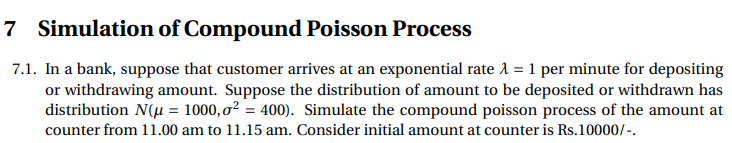

In [2]:
inter=np.random.exponential(1/2,25)
t=5
arr=np.cumsum(inter)
arr=arr[arr<t];n=len(arr)
t1=np.hstack((np.zeros(1),arr))
t2=np.hstack((arr,np.array([t])))
x=np.random.normal(1000,20,n)
zt=np.hstack((np.array([10000],'float'),10000+np.cumsum(x)))
pd.DataFrame({'start':t1,
              '----':np.repeat('<t<=',len(t1)),
              
           'end':t2,
            'amount':zt
              
             })

,start,----,end,amount
0,0.000000,<t<=,0.874183,10000.000000
1,0.874183,<t<=,1.279306,11009.435907
2,1.279306,<t<=,1.600707,11977.735554
3,1.600707,<t<=,1.647034,13017.737949
4,1.647034,<t<=,2.705109,14018.544445
5,2.705109,<t<=,3.229658,15032.828077
6,3.229658,<t<=,3.979542,16039.019737
7,3.979542,<t<=,4.095302,17023.057290
8,4.095302,<t<=,4.318334,18000.027834
9,4.318334,<t<=,4.349291,18983.483826


In [16]:
np.sqrt(4)

2.0

# Renewal Process

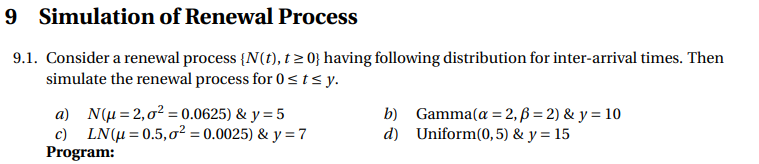

In [32]:
inter=np.random.normal(2,np.sqrt(0.0625),25)
t=5
arr=np.cumsum(inter)
arr=arr[arr<t]
t1=np.hstack((np.zeros(1),arr))
t2=np.hstack((arr,np.array([t])))
pd.DataFrame({'start':t1,
              '----':np.repeat('<t<=',len(t1)),
           'end':t2
             })

,start,----,end
0,0.000000,<t<=,2.120089
1,2.120089,<t<=,3.568071
2,3.568071,<t<=,5.000000


In [33]:
inter=np.random.gamma(2,2,25)
t=10
arr=np.cumsum(inter)
arr=arr[arr<t]
t1=np.hstack((np.zeros(1),arr))
t2=np.hstack((arr,np.array([t])))
pd.DataFrame({'start':t1,
              '----':np.repeat('<t<=',len(t1)),
           'end':t2
             })

,start,----,end
0,0.000000,<t<=,1.562153
1,1.562153,<t<=,4.088890
2,4.088890,<t<=,8.817312
3,8.817312,<t<=,10.000000


In [34]:
inter=np.random.lognormal(0.5,np.sqrt(0.0025),25)
t=7
arr=np.cumsum(inter)
arr=arr[arr<t]
t1=np.hstack((np.zeros(1),arr))
t2=np.hstack((arr,np.array([t])))
pd.DataFrame({'start':t1,
              '----':np.repeat('<t<=',len(t1)),
           'end':t2
             })

,start,----,end
0,0.000000,<t<=,1.529431
1,1.529431,<t<=,3.298138
2,3.298138,<t<=,4.900060
3,4.900060,<t<=,6.505668
4,6.505668,<t<=,7.000000


In [35]:
inter=np.random.uniform(0,5,25)
t=15
arr=np.cumsum(inter)
arr=arr[arr<t]
t1=np.hstack((np.zeros(1),arr))
t2=np.hstack((arr,np.array([t])))
pd.DataFrame({'start':t1,
              '----':np.repeat('<t<=',len(t1)),
           'end':t2
             })

,start,----,end
0,0.000000,<t<=,1.801788
1,1.801788,<t<=,2.767930
2,2.767930,<t<=,4.118139
3,4.118139,<t<=,7.087162
4,7.087162,<t<=,9.244263
5,9.244263,<t<=,13.191743
6,13.191743,<t<=,14.542057
7,14.542057,<t<=,15.000000


# M|M|1 Model

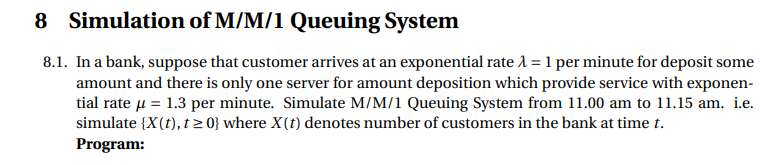

In [34]:
lamda=1;mu=1.3;t=15
inter=np.random.exponential(lamda,25)
arr=np.cumsum(inter)
arr=arr[arr<t];n1=len(arr)
ser=np.random.exponential(mu,n1)
dep=np.repeat(0,n1)
dep[0]=arr[0]+ser[0]
for i in range(1,n1):
    dep[i]=np.maximum(dep[i-1],arr[i])+ser[i]
dep=dep[dep<t]
start=np.sort(np.hstack((0,arr,dep)));n=len(start)
end=np.sort(np.hstack((t,arr,dep)))
Nt=np.repeat(0,n)
for i in range(1,n):
    Nt[i]=sum(arr<=start[i]-sum(dep<=start[i]))
    
pd.DataFrame({
    'start':start,
    'end':end,
    'no of Arrival':np.arange(1,len(start)+1)
})



,start,end,no of Arrival
0,0.000000,1.308743,1
1,1.308743,1.375347,2
2,1.375347,2.000000,3
3,2.000000,2.169349,4
4,2.169349,3.210454,5
5,3.210454,4.000000,6
6,4.000000,4.757203,7
7,4.757203,5.000000,8
8,5.000000,5.764405,9
9,5.764405,6.670986,10


# Its all About Joy! 😇